In [1]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, Visualiser

# create an initial but optional config and an api client
config = ECConfig()
preprocessing = Preprocessing()
visualiser = Visualiser()
track_api = TrackAPI(api_client=DownloadClient(config=config))

Initializing pre-processing class
Initializing visualisation class


In [2]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])


# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=10) # requesting 10 tracks inside the bbox

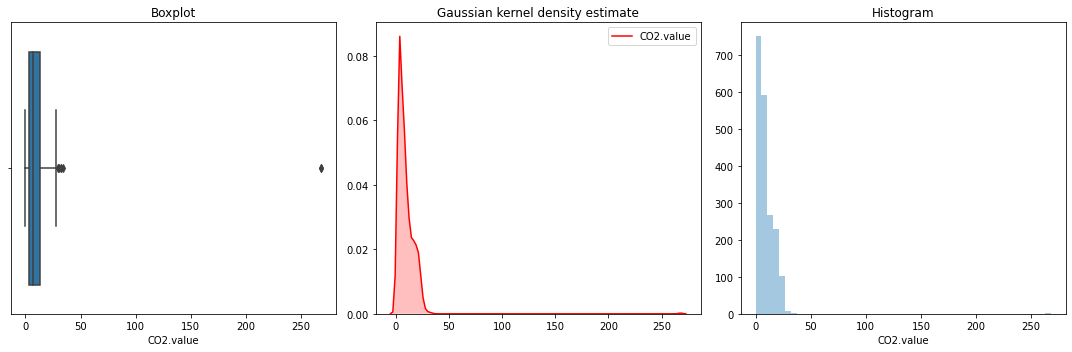

In [3]:

visualiser.plot_distribution(track_df, 'CO2.value')

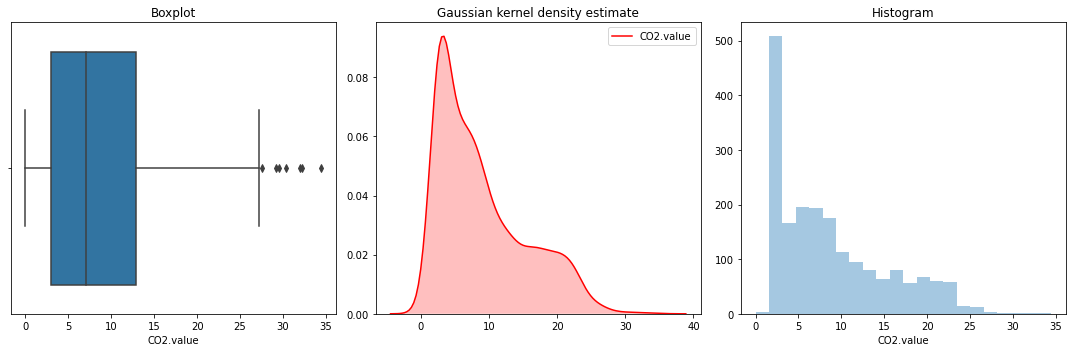

In [4]:
track_df = preprocessing.remove_outliers(track_df, 'CO2.value')
visualiser.plot_distribution(track_df, 'CO2.value')

In [20]:
visualiser.plot_point_values(track_df, "CO2.value")

In [21]:
track_df = preprocessing.calculateAcceleration(track_df)

visualiser.plot_point_values(track_df, "Acceleration.value")

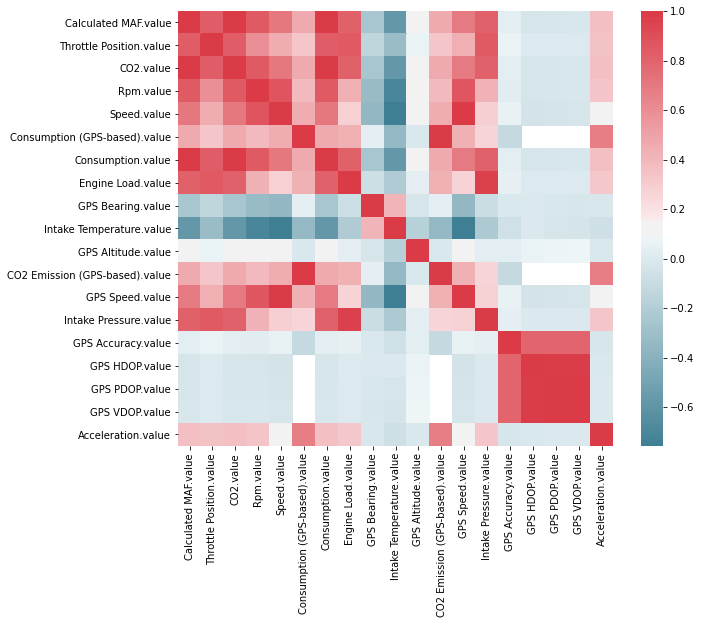

In [7]:
visualiser.plot_full_correlation(track_df)

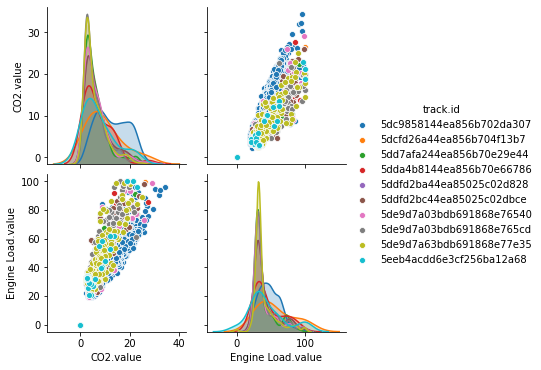

In [8]:
visualiser.plot_pair_correlation(track_df, "CO2.value", "Engine Load.value", 'id', False)

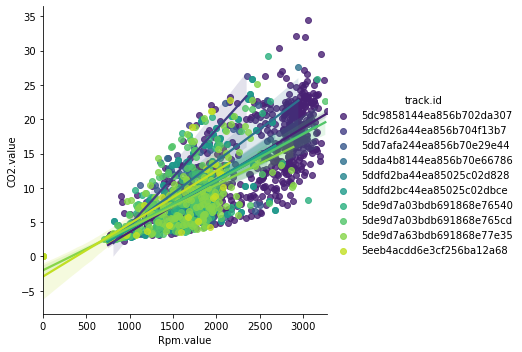

In [9]:
visualiser.plot_pair_correlation(track_df, "Rpm.value", "CO2.value", "id", True)

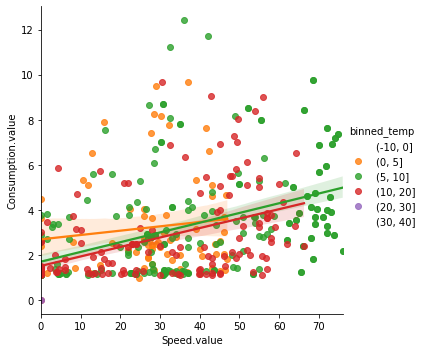

In [14]:
beginning_drive = preprocessing.split_beginning(track_df, 300)
beginning_drive = preprocessing.calculateAcceleration(beginning_drive)

visualiser.plot_pair_correlation(beginning_drive, "Speed.value", "Consumption.value", "temperature", True)